In [1]:
import torch
import torchvision
import math
import numpy as np

from skimage.io import imsave
from default_cifar_config import create_default_cifar_config
from diffusion import DiffusionRunner
from typing import Optional, Sequence
from tqdm.auto import trange

from matplotlib import pyplot as plt

In [2]:
config = create_default_cifar_config()
config.device = 'cuda:0'

gen = DiffusionRunner(config, eval=True)

In [3]:
def plot_images(images: Optional[torch.Tensor] = None):
    if images is None:
        images = gen.sample_images(batch_size=100, verbose=True)
    images = images.cpu()
    nrow = int(math.sqrt(images.shape[0]))
    grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
    grid = grid.data.numpy().astype(np.uint8)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(grid)
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

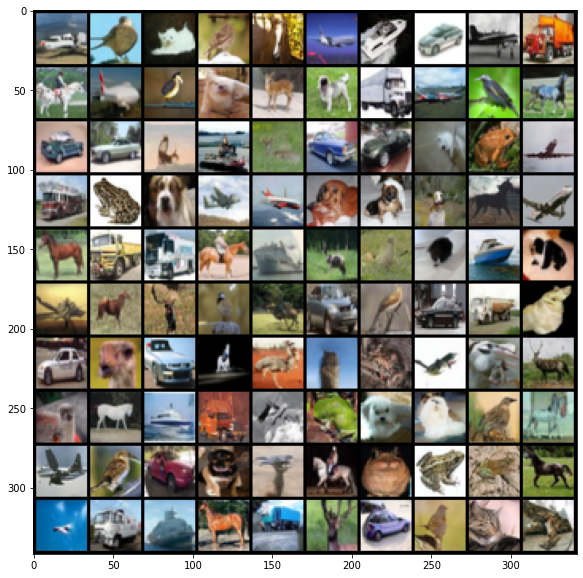

In [4]:
plot_images()

  0%|          | 0/10 [00:00<?, ?it/s]

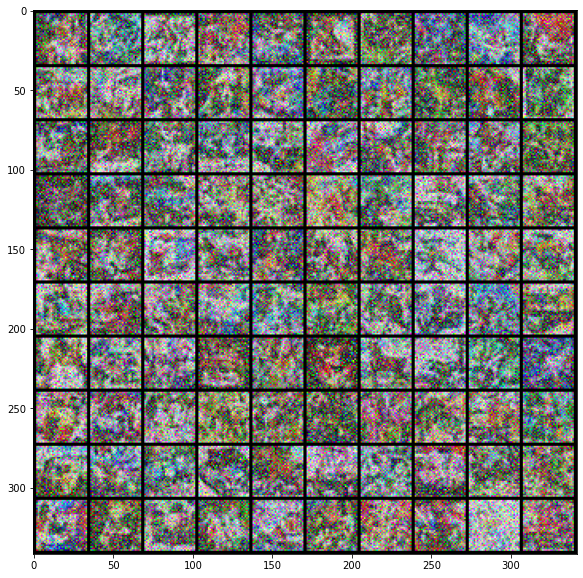

In [9]:
config = create_default_cifar_config()
config.device = 'cuda:0'
config.sde.N = 10

gen = DiffusionRunner(config, eval=True)

plot_images()

  0%|          | 0/100 [00:00<?, ?it/s]

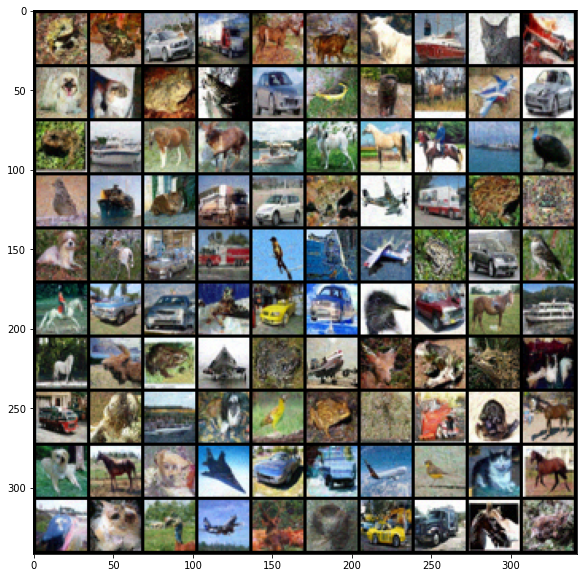

In [10]:
config = create_default_cifar_config()
config.device = 'cuda:0'
config.sde.N = 100

gen = DiffusionRunner(config, eval=True)

plot_images()

In [15]:
import wandb

def experiment_with_number_of_steps():
    wandb.init(project='cont_ddpm_example', name='visualization')
    
    for N in [10, 25, 50, 100, 250, 500, 1000]:
        config = create_default_cifar_config()
        config.device = 'cuda:0'
        config.sde.N = N

        gen = DiffusionRunner(config, eval=True)
        
        images = gen.sample_images(batch_size=100, verbose=True)
        images = images.cpu()
        nrow = int(math.sqrt(images.shape[0]))
        grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
        grid = grid.data.numpy().astype(np.uint8)
        
        wandb.log({'images/from_noise': wandb.Image(grid)}, step=N)
experiment_with_number_of_steps()

wandb: Currently logged in as: leviathanisss (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.21 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
2022-07-19 15:19:23.267263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2022-07-19 15:19:23.267296: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


  0%|          | 0/10 [00:00<?, ?it/s]

2022-07-19 15:19:30.635829: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:


  0%|          | 0/25 [00:00<?, ?it/s]

2022-07-19 15:19:31.421239: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2022-07-19 15:19:31.511803: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]